In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive')

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#visualisation with sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Plotting the graphs
import plotly.express as px

Reading the Dataset

In [ ]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


CSV Info

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.shape

(2200, 8)

Check if values are null or not

In [ ]:
crop.isnull().sum()
#no null value

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Correlation Matrix

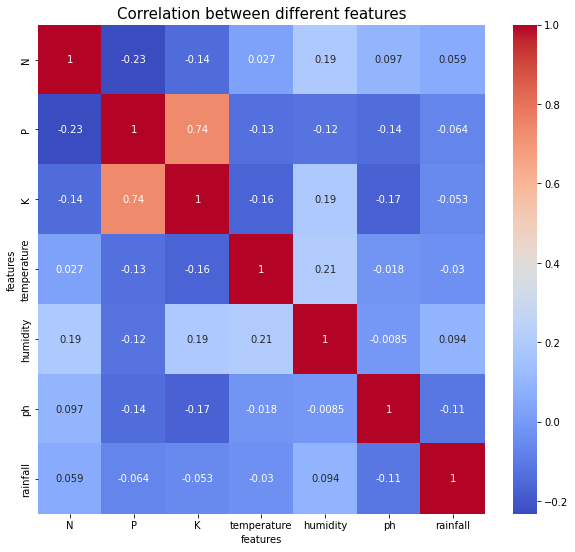

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
sns.heatmap(crop.corr(), annot=True, cmap='coolwarm')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

Exploratory data analysis

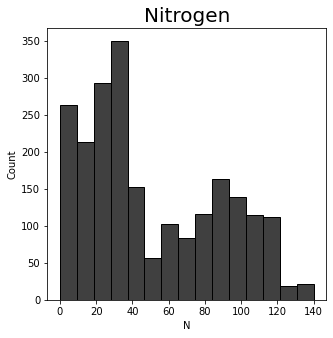

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='N',data=crop,color='black');
plt.title("Nitrogen",{'fontsize':20});

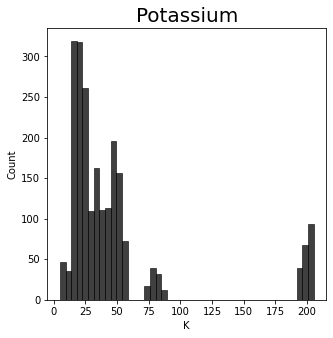

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='K',data=crop,color='black');
plt.title("Potassium",{'fontsize':20});

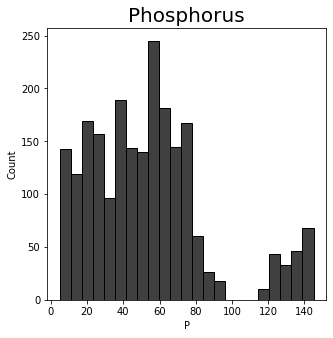

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='P',data=crop,color='black');
plt.title("Phosphorus",{'fontsize':20});

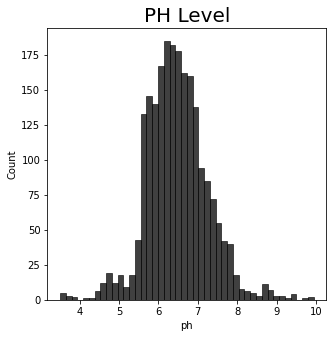

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='ph',data=crop,color='black');
plt.title("PH Level",{'fontsize':20});

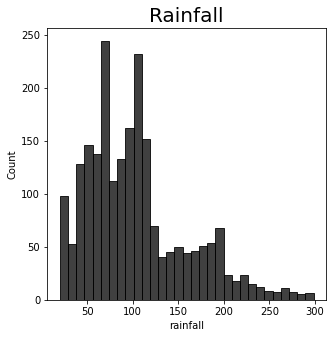

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='rainfall',data=crop,color='black');
plt.title("Rainfall",{'fontsize':20});

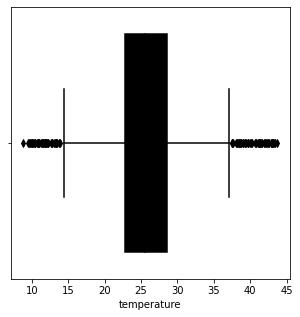

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x=crop.temperature,color='black');

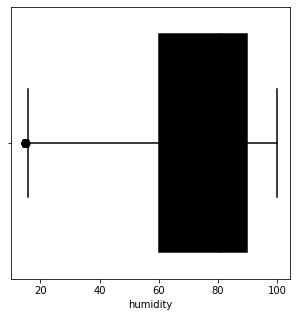

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x=crop.humidity,color='black');

In [ ]:
crop_summary=pd.pivot_table(crop,index='label',values=['temperature','rainfall','N','P','K','humidity','ph'])
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
a = crop[crop['N'] > 120]['label'].unique()
b = crop[crop['P'] > 100]['label'].unique()
c = crop[crop['K'] > 200]['label'].unique()
d = crop[crop['temperature'] > 30]['label'].unique()
e = crop[crop['temperature'] < 10]['label'].unique()
f = crop[crop['humidity'] < 20]['label'].unique()
g = crop[crop['ph'] > 8]['label'].unique()
h = crop[crop['ph'] < 4]['label'].unique()
i = crop[crop['rainfall'] > 200]['label'].unique()
j = crop[crop['rainfall'] < 40]['label'].unique()

Detail = pd.DataFrame({'High Nitrogen':pd.Series(a),'High Phospor':pd.Series(b),
                             'High Potassium':pd.Series(c),'High Temperature':pd.Series(d),
                             'Low Temperature':pd.Series(e),'Low Humidity':pd.Series(f),
                             'High pH':pd.Series(g),'Low pH':pd.Series(h),
                             'High Rainfall':pd.Series(i),'Low Rainfall':pd.Series(j)})

Detail = Detail.replace(np.nan, '-')

display(Detail)

,High Nitrogen,High Phospor,High Potassium,High Temperature,Low Temperature,Low Humidity,High pH,Low pH,High Rainfall,Low Rainfall
0,cotton,grapes,grapes,pigeonpeas,grapes,chickpea,chickpea,mothbeans,rice,mothbeans
1,-,apple,apple,mothbeans,-,kidneybeans,mothbeans,-,papaya,mungbean
2,-,-,-,blackgram,-,-,-,-,coconut,lentil
3,-,-,-,mango,-,-,-,-,-,muskmelon
4,-,-,-,grapes,-,-,-,-,-,-
5,-,-,-,orange,-,-,-,-,-,-
6,-,-,-,papaya,-,-,-,-,-,-


In [ ]:
k=(crop[(crop['temperature'] < 20) & (crop['humidity'] < 40)]['label'].unique())
l=(crop[(crop['temperature'] > 28) & (crop['humidity'] > 40)]['label'].unique())
m=(crop[(crop['rainfall'] > 200)] ['label'].unique())

Env = pd.DataFrame({'Winter Crop':pd.Series(k),'Summer Crop':pd.Series(l),'Rainfall Crop':pd.Series(m)})

Env= Env.replace(np.nan, '-')

display(Env)

,Winter Crop,Summer Crop,Rainfall Crop
0,chickpea,pigeonpeas,rice
1,kidneybeans,mothbeans,papaya
2,pigeonpeas,mungbean,coconut
3,-,blackgram,-
4,-,lentil,-
5,-,banana,-
6,-,mango,-
7,-,grapes,-
8,-,muskmelon,-
9,-,orange,-


Splitting the dataset into the Training set and Test set

In [ ]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

acc = []
model = []

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Modeling Classification algorithms

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))

Training accuracy =  1.0


In [ ]:
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Testing accuracy =  0.990909090909091


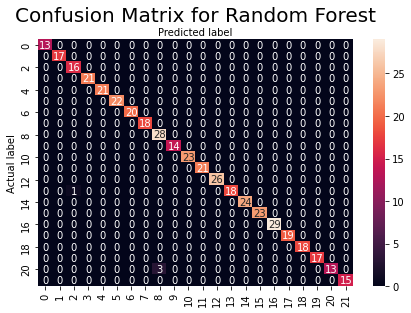

In [ ]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,predicted_values)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Predicting a new result

In [ ]:
print("Enter your own data to test the model:")
N = int(input("Enter Nitrogen:"))
P = int(input("Enter Phosphorus:"))
K = int(input("Enter Potassium:"))
temp = float(input("Enter Temperature:"))
humidity = float(input("Enter Humidity:"))
ph = float(input("Enter pH:"))
rainfall = float(input("Enter Rainfall:"))
userInput = [N, P, K, temp, humidity, ph, rainfall]

result = RF.predict([userInput])[0]
print("The input provided is classified as:",result)

Enter your own data to test the model:
